**Lets start working with the LOAN dataset.**

In [1]:
# lets import the required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") # never prints matching warning.


In [2]:
df = pd.read_csv('train.csv')

Now we see that the data  is having 614 rows and 13 columns.

In [3]:
df.shape

(614, 13)

In [4]:
df.info()  # for the detailed information about each column.
# We can aslo identify if we have missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [6]:
df['Credit_History'] = df['Credit_History'].astype('O')

In [7]:
# describe categorical data ("object")

df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002379,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [8]:
#Lets drop the 'Loan_ID' attribute as it doesn't make any impact. 
df.drop('Loan_ID', axis=1, inplace=True)

In [9]:
#To check if there's any duplicate rows.
df.duplicated().any()


False

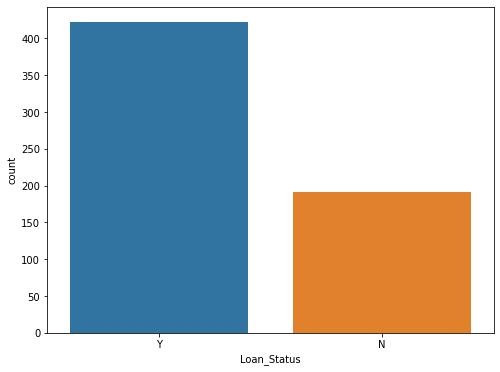

In [10]:
plt.figure(figsize=(8,6)) #This creates a figure object, which has a width of 8 inches and 6 inches in height.
sns.countplot(df['Loan_Status']);

    Lets check if the ratio of 'Y' to 'N' is equal.

In [11]:
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

The percentage of Y class : 0.69
The percentage of N class : 0.31


In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

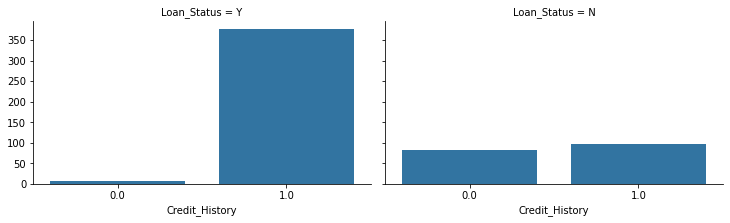

In [13]:
#Credit History

grid = sns.FacetGrid(df, col = 'Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Credit_History');

**From the above chart we realize that people with credit history = 1 gets loan easily. **

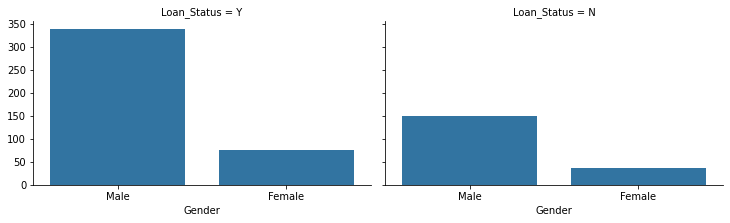

In [14]:
#Gender

grid  = sns.FacetGrid(df, col = 'Loan_Status', size = 3.2, aspect  = 1.6)
grid.map(sns.countplot, 'Gender');

From the above chart we realize that if the person is mail then the possibility of getting the loan is high.

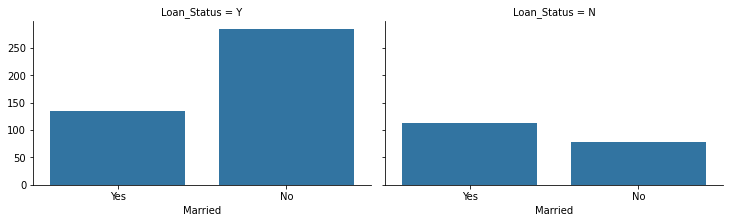

In [15]:
#Married
grid = sns.FacetGrid(df , col = 'Loan_Status', size = 3.2, aspect = 1.6)
grid.map(sns.countplot, 'Married');

From the above chart we realize that more of people who were not married were given the loan.

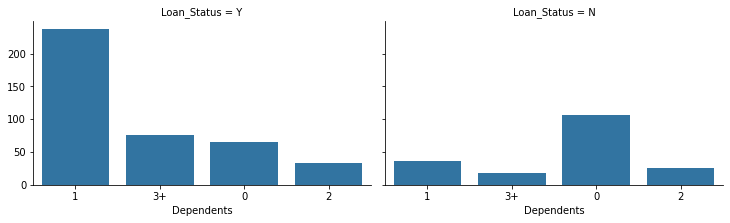

In [16]:
#dependent
grid = sns.FacetGrid(df, col = 'Loan_Status', size=3.2, aspect= 1.6)
grid.map(sns.countplot, 'Dependents');

from the above chart we can say the applicants with one dependant has more

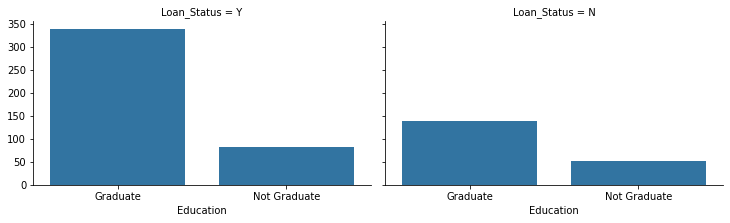

In [17]:
#Education
grid = sns.FacetGrid(df, col = 'Loan_Status', size=3.2, aspect= 1.6)
grid.map(sns.countplot, 'Education');

From the above chart we can notice that the graduates have a better chance of getting a job.

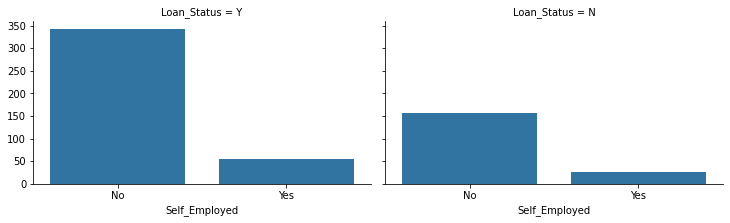

In [18]:
#Self_Employed
grid = sns.FacetGrid(df, col = 'Loan_Status', size=3.2, aspect= 1.6)
grid.map(sns.countplot, 'Self_Employed');

From the above chart we can realize that poeple who are **not self employed** have recieved loan.

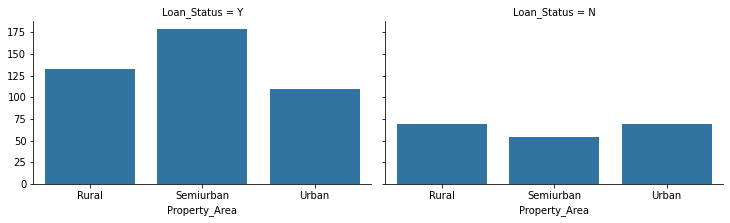

In [19]:
#Property_Area
grid = sns.FacetGrid(df, col = 'Loan_Status', size=3.2, aspect= 1.6)
grid.map(sns.countplot, 'Property_Area');

1. From the above chart we can notice that the semi urban area have higher chance of getting the loan.

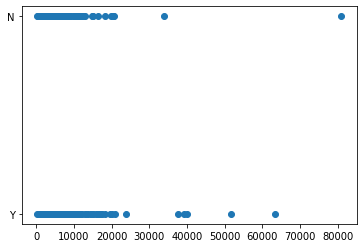

In [20]:
#applicant income

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

From the above chart we see we can't find any particular pattern.

**Now lets move on to the NUMERICAL VARIABLES.**

In [21]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


From the above data we can see that the loan has been approved if the **Co-applicant's income** is really high.

**NOW its time to handle all the MISSING VALUES in out data.**

In [22]:
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [23]:
#Now let's start separating categorical and numerical data.

cat_data = []
num_data = []

for i, c in enumerate(df.dtypes) :
    if c == object:
        cat_data.append(df.iloc[:, i])
    else: 
        num_data.append(df.iloc[:, i])

In [24]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [25]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [26]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [27]:
#for categorical data

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

cat_data.isnull().sum().any()

False

In [28]:
num_data.fillna(method='bfill', inplace=True)

num_data.isnull().sum().any()

False

In [29]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [30]:
#transform the target column.
target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [31]:
#LETS transform all other columns.
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [32]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [33]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [34]:
df = pd.concat([cat_data, num_data, target], axis =1)

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


**TRAINING THE DATA**

lets use StratifiedShuffleSplit

In [36]:
X = pd.concat([cat_data,num_data], axis= 1)
y = target

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape ', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape ', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))



X_train shape  (491, 11)
y_train shape (491,)
X_test shape  (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [38]:
#we can use 4 different algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression: ' : LogisticRegression(random_state=42), 
    'KNeighborsClassifier :' : KNeighborsClassifier(),
    'SVC:' : SVC(random_state=42),
    'DecisionTreeClassifier: ': DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [39]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [40]:

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)


LogisticRegression:  :
  pre: 0.921
  rec: 0.455
  f1: 0.609
  loss: 6.331
  acc: 0.817
------------------------------
KNeighborsClassifier : :
  pre: 0.647
  rec: 0.357
  f1: 0.460
  loss: 9.074
  acc: 0.737
------------------------------
SVC: :
  pre: 1.000
  rec: 0.019
  f1: 0.038
  loss: 10.622
  acc: 0.692
------------------------------
DecisionTreeClassifier:  :
  pre: 0.931
  rec: 0.435
  f1: 0.593
  loss: 6.472
  acc: 0.813
------------------------------


here we see the logistic regression has the maximum score.

In [41]:
X_train.shape

(491, 11)

In [42]:
#cross_validation

from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=10, random_state=42, shuffle = True)

def train_eval_cross(models, X , y, folds):
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    idx = ['pre', 'rec', 'f1', 'loss', 'acc'] 
    
    for name, model in models.items():
        ls = []
        print(name, ':')
        
        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test], y_pred, retu= True))
        print(pd.DataFrame(np.array(ls).mean(axis =0),index = idx)[0])
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression:  :
pre     0.817222
rec     0.413333
f1      0.540338
loss    6.895081
acc     0.800367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre      0.401455
rec      0.201667
f1       0.255282
loss    12.590532
acc      0.635469
Name: 0, dtype: float64
------------------------------
SVC: :
pre      0.000000
rec      0.000000
f1       0.000000
loss    10.832488
acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------


Here we can see that DecisionTreeClassifier is giving us more accuracy than logistic regression.

#lets do Feature engineering. 

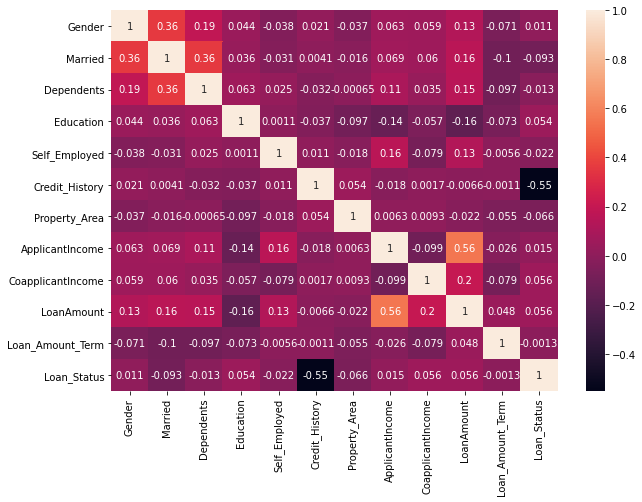

In [43]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [44]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
121,0,0,0,0,0,1,1,4166.0,0.0,44.0,360.0
359,1,1,3,0,0,1,1,5167.0,3167.0,200.0,360.0
132,1,0,0,0,0,1,1,2718.0,0.0,70.0,360.0
525,1,1,2,0,1,1,0,17500.0,0.0,400.0,360.0
360,0,0,1,0,0,1,1,4723.0,0.0,81.0,360.0


In [45]:
X_train['new_col'] = X_train['CoapplicantIncome'] / X_train['ApplicantIncome']  
X_train['new_col_2'] = X_train['LoanAmount'] * X_train['Loan_Amount_Term'] 

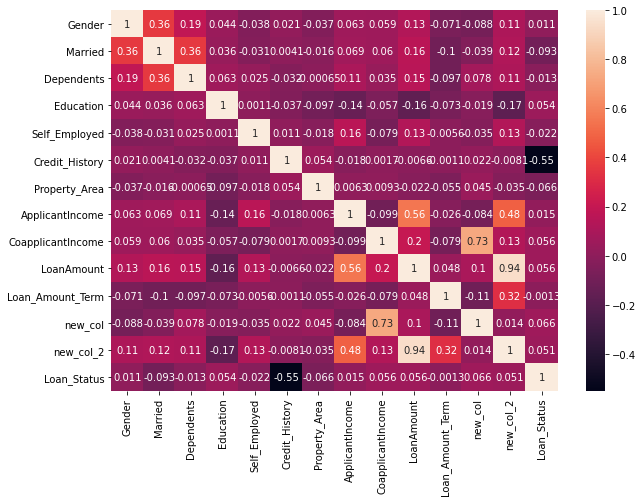

In [46]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [47]:
X_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [48]:
train_eval_cross(models, X_train, y_train, skf)


LogisticRegression:  :
pre      0.150000
rec      0.026667
f1       0.041071
loss    10.762006
acc      0.688408
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre      0.251581
rec      0.115833
f1       0.152264
loss    13.784594
acc      0.600898
Name: 0, dtype: float64
------------------------------
SVC: :
pre      0.000000
rec      0.000000
f1       0.000000
loss    11.041135
acc      0.680327
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------


#as we can see the decision tree is still doing great :)

In [49]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    405
0     86
Name: Gender, dtype: int64
------------------------------------------------
1    316
0    175
Name: Married, dtype: int64
------------------------------------------------
0    293
2     82
1     71
3     45
Name: Dependents, dtype: int64
------------------------------------------------
0    380
1    111
Name: Education, dtype: int64
------------------------------------------------
0    425
1     66
Name: Self_Employed, dtype: int64
------------------------------------------------
1    419
0     72
Name: Credit_History, dtype: int64
------------------------------------------------
1    184
2    155
0    152
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000      220
0.735294        2
0.651927        1
0.278465        1
0.255325        1
             ... 
0.617730        1
100.161058      1
0.491158        1
0.269873        1
0.735000        1
Name: new_col, Length: 271, dtype: int64
----------------------------------------------

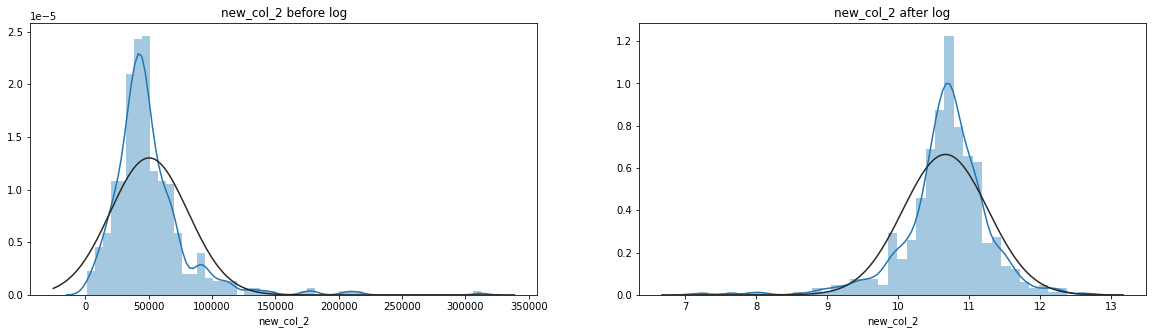

In [50]:
from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(X_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

X_train['new_col_2'] = np.log(X_train['new_col_2'])  # here we take the log of all these values.

sns.distplot(X_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [51]:
train_eval_cross(models, X_train, y_train, skf)
# taking log has drastically improved our model.

LogisticRegression:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre     0.725913
rec     0.383333
f1      0.486911
loss    8.441600
acc     0.755592
Name: 0, dtype: float64
------------------------------
SVC: :
pre      0.090000
rec      0.056250
f1       0.069231
loss    10.339080
acc      0.700653
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------


In [52]:
print('before:')
print(X_train['new_col'].value_counts())

X_train['new_col'] = [x if x==0 else 1 for x in X_train['new_col']]
print('-'*50)
print('\nafter:')
print(X_train['new_col'].value_counts())

before:
0.000000      220
0.735294        2
0.651927        1
0.278465        1
0.255325        1
             ... 
0.617730        1
100.161058      1
0.491158        1
0.269873        1
0.735000        1
Name: new_col, Length: 271, dtype: int64
--------------------------------------------------

after:
1.0    271
0.0    220
Name: new_col, dtype: int64


In [53]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre     0.692370
rec     0.351250
f1      0.453114
loss    8.935014
acc     0.741306
Name: 0, dtype: float64
------------------------------
SVC: :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.942778
rec     0.434167
f1      0.585015
loss    6.472152
acc     0.812612
Name: 0, dtype: float64
------------------------------


In [54]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')


1    405
0     86
Name: Gender, dtype: int64
------------------------------------------------
1    316
0    175
Name: Married, dtype: int64
------------------------------------------------
0    293
2     82
1     71
3     45
Name: Dependents, dtype: int64
------------------------------------------------
0    380
1    111
Name: Education, dtype: int64
------------------------------------------------
0    425
1     66
Name: Self_Employed, dtype: int64
------------------------------------------------
1    419
0     72
Name: Credit_History, dtype: int64
------------------------------------------------
1    184
2    155
0    152
Name: Property_Area, dtype: int64
------------------------------------------------
1.0    271
0.0    220
Name: new_col, dtype: int64
------------------------------------------------
10.673596    16
10.586584    13
10.491274    12
10.961278    12
10.753638    10
             ..
10.013238     1
9.937889      1
10.727663     1
11.391436     1
8.626944      1
Name: new_

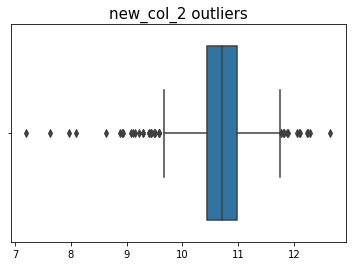

In [55]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('');

In [56]:
threshold= 0.1

new_col_2_out = X_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([X_train, y_train], axis=1)
print('\nlen X_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len X_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.439980923050696 , Quartile 75: 10.97060438155858
iqr: 0.5306234585078844
Cut Off: 0.053062345850788444
Lower: 10.386918577199907
Upper: 11.023666727409369
Nubers of Outliers: 222
outliers:[9.670293665368417, 11.184421397998193, 10.134599273499514, 11.877568578558138, 10.280553186122594, 10.38591370178042, 9.392661928770137, 10.249202656238518, 9.51044496442652, 11.542095842270008, 11.520893634619405, 10.14878390849147, 11.427367576608582, 11.643953727376633, 9.112948025967533, 10.38591370178042, 9.980448593672257, 11.261382439134321, 11.741175953652583, 11.302204433654575, 11.06788758174224, 9.574983485564092, 11.101039789059142, 11.106459856528481, 10.075758773476581, 10.280553186122594, 10.14878390849147, 11.039395625947934, 11.143599403477937, 11.62589694362939, 11.270599094239245, 10.35201215010474, 11.138377459496786, 11.084601062715981, 10.328755287940472, 11.233211562167625, 11.039395625947934, 9.144200569471638, 10.134599273499514, 11.117212648304742, 11.4467856

In [57]:
X_train = data_outliers.drop('Loan_Status', axis=1)
y_train = data_outliers['Loan_Status']

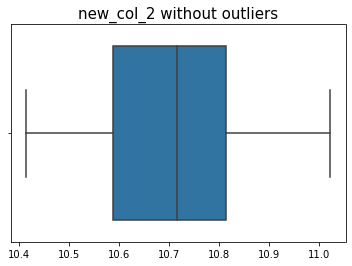

In [58]:
sns.boxplot(X_train['new_col_2']);
plt.title('new_col_2 without outliers', fontsize=15);
plt.xlabel('');

In [59]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression:  :
pre     0.920000
rec     0.526786
f1      0.665105
loss    4.890545
acc     0.858405
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre     0.695000
rec     0.482143
f1      0.549705
loss    6.947166
acc     0.798860
Name: 0, dtype: float64
------------------------------
SVC: :
pre     0.000000
rec     0.000000
f1      0.000000
loss    9.244781
acc     0.732336
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.920000
rec     0.539286
f1      0.675361
loss    4.762624
acc     0.862108
Name: 0, dtype: float64
------------------------------


# Lets select the final features required.

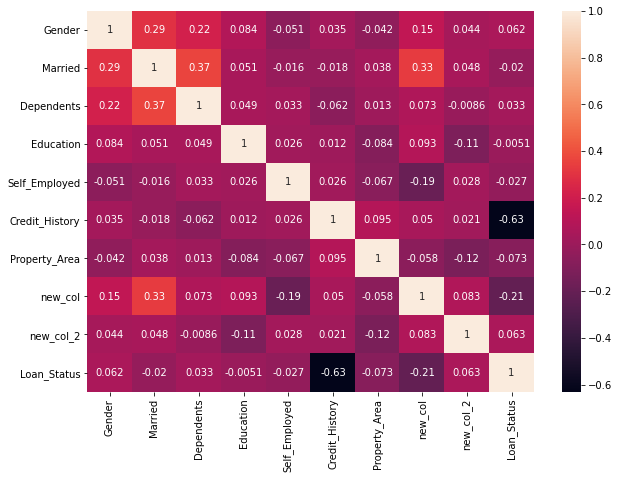

In [60]:
# Lets check the correlation.
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

In [61]:
X_train.drop(['Self_Employed'], axis=1, inplace=True)

train_eval_cross(models, X_train, y_train, skf)


LogisticRegression:  :
pre     0.920000
rec     0.526786
f1      0.665105
loss    4.890545
acc     0.858405
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier : :
pre     0.735000
rec     0.441071
f1      0.540240
loss    6.691309
acc     0.806268
Name: 0, dtype: float64
------------------------------
SVC: :
pre     0.000000
rec     0.000000
f1      0.000000
loss    9.244781
acc     0.732336
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier:  :
pre     0.920000
rec     0.539286
f1      0.675361
loss    4.762624
acc     0.862108
Name: 0, dtype: float64
------------------------------


In [62]:
X_train.drop(['Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

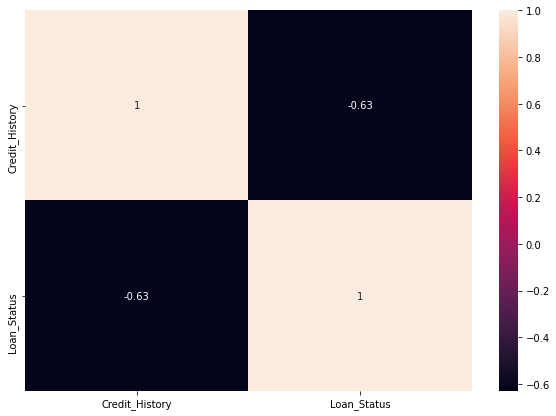

In [63]:
data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# lets test our model on the test data.

In [64]:
#X_test1 = pd.read_csv('test.csv')

In [65]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
423,1,1,1,0,0,0,2,7250.0,1667.0,110.0,360.0
157,1,1,1,0,0,1,2,9538.0,0.0,187.0,360.0
301,1,1,0,1,0,1,1,2875.0,1750.0,105.0,360.0
424,1,1,0,0,0,1,1,14880.0,0.0,96.0,360.0
97,1,1,0,0,0,1,1,1977.0,997.0,50.0,360.0


In [66]:
X_test_new = X_test.copy()

In [67]:
x = []

X_test_new['new_col'] = X_test_new['CoapplicantIncome'] / X_test_new['ApplicantIncome']  
X_test_new['new_col_2'] = X_test_new['LoanAmount'] * X_test_new['Loan_Amount_Term']
X_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

X_test_new['new_col_2'] = np.log(X_test_new['new_col_2'])

X_test_new['new_col'] = [x if x==0 else 1 for x in X_test_new['new_col']]

X_test_new.drop(['Self_Employed'], axis=1, inplace=True)

# drop all the features Except for Credit_History
#X_test_new.drop(['Self_Employed','Dependents', 'new_col_2', 'Education', 'Gender', 'Property_Area','Married', 'new_col'], axis=1, inplace=True)

In [68]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)

LogisticRegression: :
  pre: 0.889
  rec: 0.421
  f1: 0.571
  loss: 6.739
  acc: 0.805
----------------------------------------
KNeighborsClassifier ::
  pre: 0.692
  rec: 0.237
  f1: 0.353
  loss: 9.267
  acc: 0.732
----------------------------------------
SVC::
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.671
  acc: 0.691
----------------------------------------
DecisionTreeClassifier: :
  pre: 0.882
  rec: 0.395
  f1: 0.545
  loss: 7.020
  acc: 0.797
----------------------------------------


In [69]:
#So we can see that the logistic and decision tree performs well with the given data. 